In [89]:
# Load judge_results.csv into a pandas DataFrame and display the first 5 rows
import pandas as pd

df = pd.read_csv('judge_results.csv')
df.head()

,type,name,fact,evidence,score,accepted
0,node,Organization,QinetiQ North America is an organization.,China’s Cyberspies Outwit Model for Bond’s Q.A...,0.999958,True
1,node,Person,George Tenet is a person.,China’s Cyberspies Outwit Model for Bond’s Q.A...,0.999945,True
2,node,Person,Stephen Cambone is a person.,China’s Cyberspies Outwit Model for Bond’s Q.A...,0.999953,True
3,node,Country,China is a country.,China’s Cyberspies Outwit Model for Bond’s Q.A...,0.999780,True
4,node,Organization,Verizon Communications Inc. is an organization.,China’s Cyberspies Outwit Model for Bond’s Q.A...,0.999314,True


In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# FT-style theme
sns.set_theme(
    style="whitegrid",
    rc={
        "axes.facecolor": "#f5f5f5",   # light beige background
        "grid.color": "#d6d6d6",
        "axes.edgecolor": "#d6d6d6",
        "axes.labelcolor": "#333333",
        "xtick.color": "#333333",
        "ytick.color": "#333333",
        "font.family": "sans-serif",
        "font.sans-serif": ["Helvetica", "Arial", "DejaVu Sans"],
    }
)

# FT-style color palette
ft_palette = ["#0072ce", "#f58220", "#6c6f70", "#c4d600", "#9b0056"]
sns.set_palette(ft_palette)

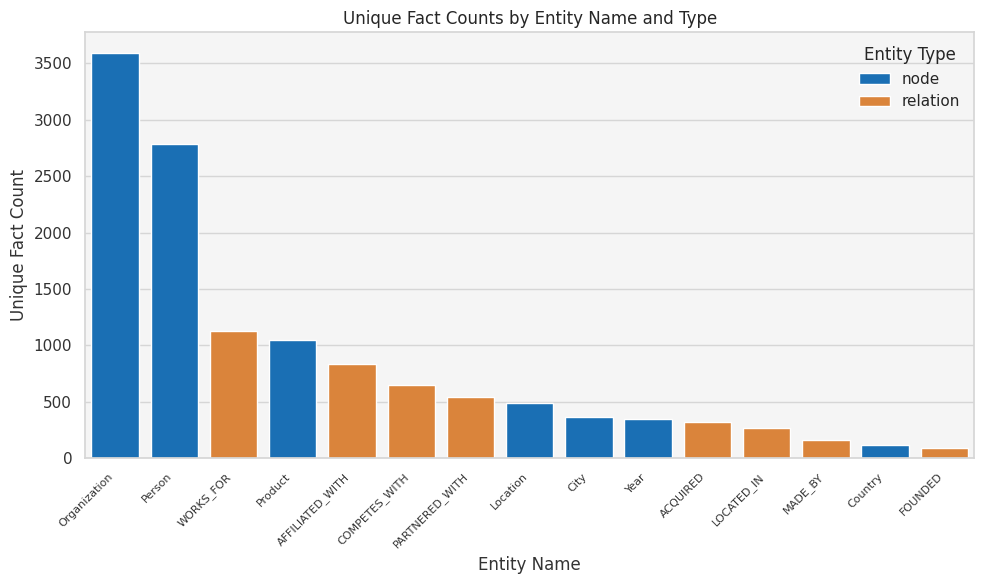

In [91]:
# Deduplicate by fact
df_unique = df.drop_duplicates(subset=["fact"])

# Count unique facts per type and name
counts = (
    df_unique.groupby(["type", "name"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x="name", y="count", hue="type")

plt.title("Unique Fact Counts by Entity Name and Type")
plt.xlabel("Entity Name")
plt.ylabel("Unique Fact Count")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.legend(title="Entity Type", frameon=False)
plt.tight_layout()
plt.show()


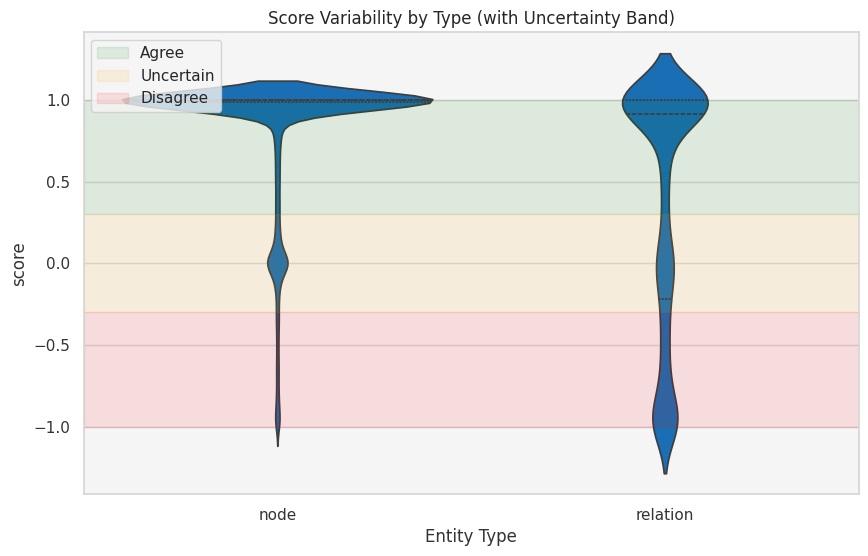

In [92]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="type", y="score", inner="quartile")

# Add shaded bands for "Agree", "Uncertain", and "Disagree" zones
plt.axhspan(0.3, 1.0, color="green", alpha=0.1, label="Agree")
plt.axhspan(-0.3, 0.3, color="orange", alpha=0.1, label="Uncertain")
plt.axhspan(-1.0, -0.3, color="red", alpha=0.1, label="Disagree")

plt.title("Score Variability by Type (with Uncertainty Band)")
plt.xlabel("Entity Type")
plt.legend(loc="upper left")
plt.show()


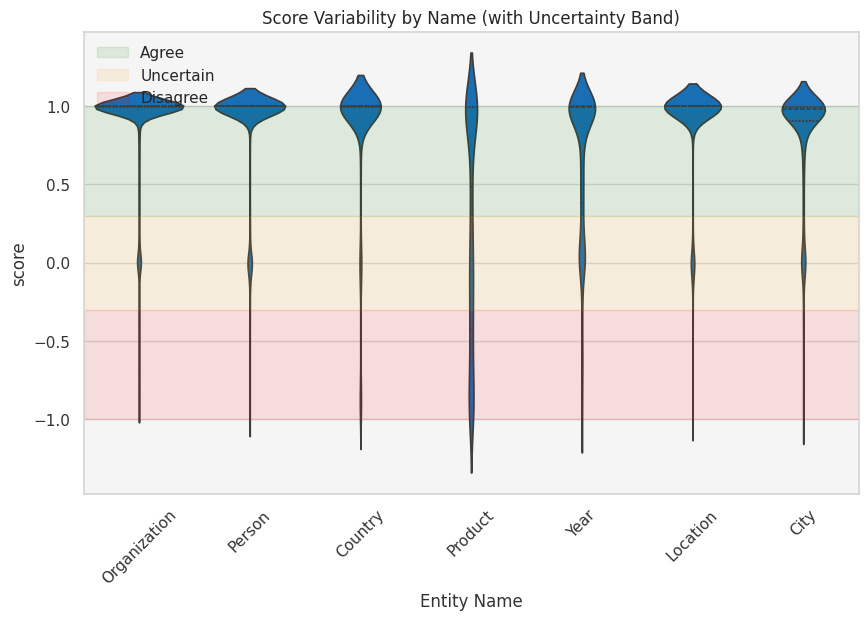

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

df_node = df[df['type'] == 'node']

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_node, x="name", y="score", inner="quartile")

# Add shaded bands for "Agree", "Uncertain", and "Disagree" zones
plt.axhspan(0.3, 1.0, color="green", alpha=0.1, label="Agree")
plt.axhspan(-0.3, 0.3, color="orange", alpha=0.1, label="Uncertain")
plt.axhspan(-1.0, -0.3, color="red", alpha=0.1, label="Disagree")

plt.title("Score Variability by Name (with Uncertainty Band)")
plt.xlabel("Entity Name")
plt.xticks(rotation=45)
plt.legend(loc="upper left", frameon=False)
plt.show()

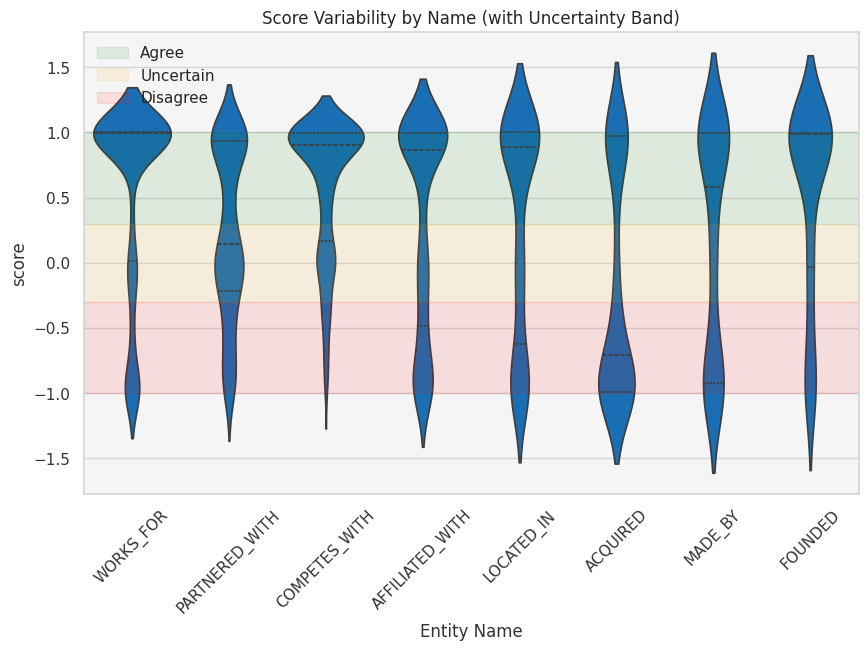

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

df_rel = df[df['type'] == 'relation']

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_rel, x="name", y="score", inner="quartile")

# Add shaded bands for "Agree", "Uncertain", and "Disagree" zones
plt.axhspan(0.3, 1.0, color="green", alpha=0.1, label="Agree")
plt.axhspan(-0.3, 0.3, color="orange", alpha=0.1, label="Uncertain")
plt.axhspan(-1.0, -0.3, color="red", alpha=0.1, label="Disagree")

plt.title("Score Variability by Name (with Uncertainty Band)")
plt.xlabel("Entity Name")
plt.xticks(rotation=45)
plt.legend(loc="upper left", frameon=False)
plt.show()

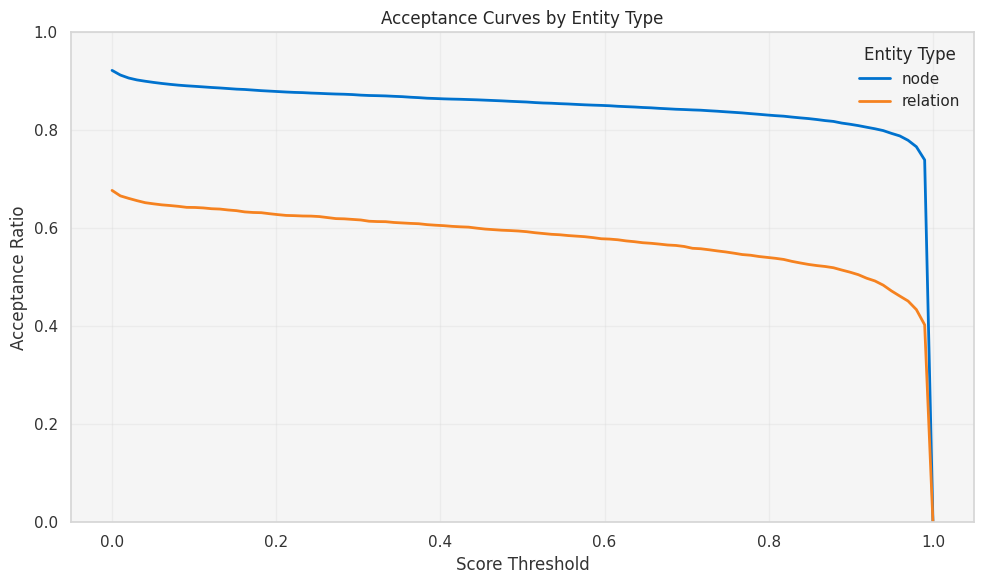

In [95]:
import numpy as np

# Define thresholds
thresholds = np.linspace(0.0, 1.0, 100)

# Compute acceptance ratio per type and threshold
records = []
for t in thresholds:
    for name, grp in df.groupby("type"):
        ratio = (grp["score"] >= t).mean()
        records.append({"threshold": t, "type": name, "acceptance_ratio": ratio})

curves = pd.DataFrame(records)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=curves, x="threshold", y="acceptance_ratio", hue="type", linewidth=2)

plt.title("Acceptance Curves by Entity Type")
plt.xlabel("Score Threshold")
plt.ylabel("Acceptance Ratio")
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.legend(title="Entity Type", frameon=False)
plt.tight_layout()
plt.show()


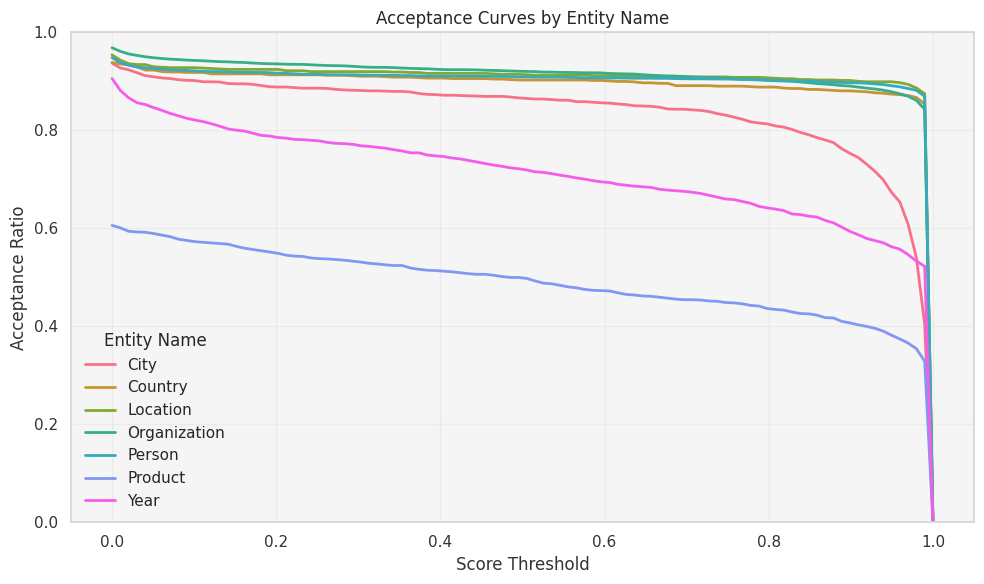

In [96]:
# Compute acceptance ratio per type and threshold
records = []
for t in thresholds:
    for name, grp in df_node.groupby("name"):
        ratio = (grp["score"] >= t).mean()
        records.append({"threshold": t, "name": name, "acceptance_ratio": ratio})

curves = pd.DataFrame(records)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=curves, x="threshold", y="acceptance_ratio", hue="name", linewidth=2)

plt.title("Acceptance Curves by Entity Name")
plt.xlabel("Score Threshold")
plt.ylabel("Acceptance Ratio")
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.legend(title="Entity Name", frameon=False)
plt.tight_layout()
plt.show()

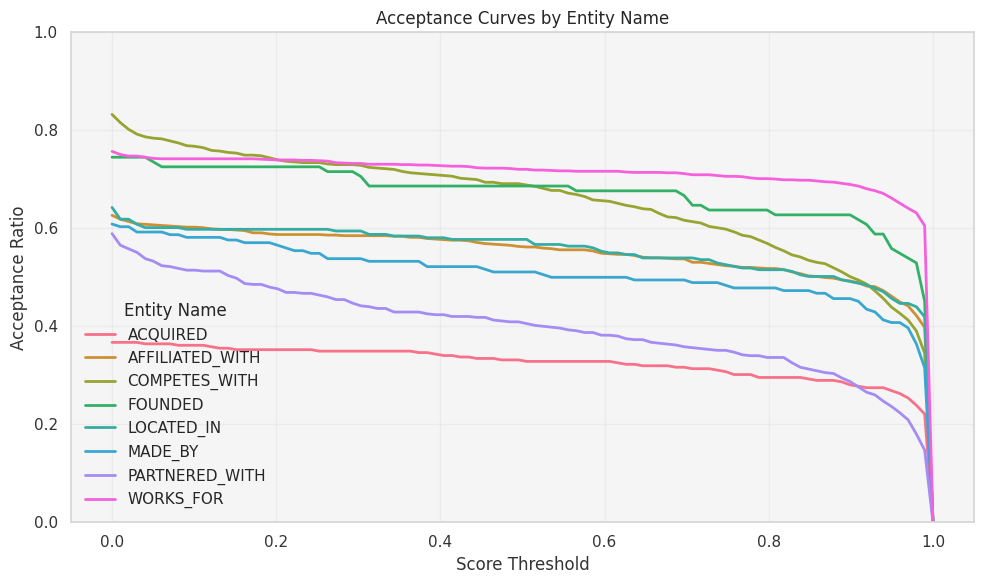

In [97]:
# Compute acceptance ratio per type and threshold
records = []
for t in thresholds:
    for name, grp in df_rel.groupby("name"):
        ratio = (grp["score"] >= t).mean()
        records.append({"threshold": t, "name": name, "acceptance_ratio": ratio})

curves = pd.DataFrame(records)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=curves, x="threshold", y="acceptance_ratio", hue="name", linewidth=2)

plt.title("Acceptance Curves by Entity Name")
plt.xlabel("Score Threshold")
plt.ylabel("Acceptance Ratio")
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.legend(title="Entity Name", frameon=False)
plt.tight_layout()
plt.show()

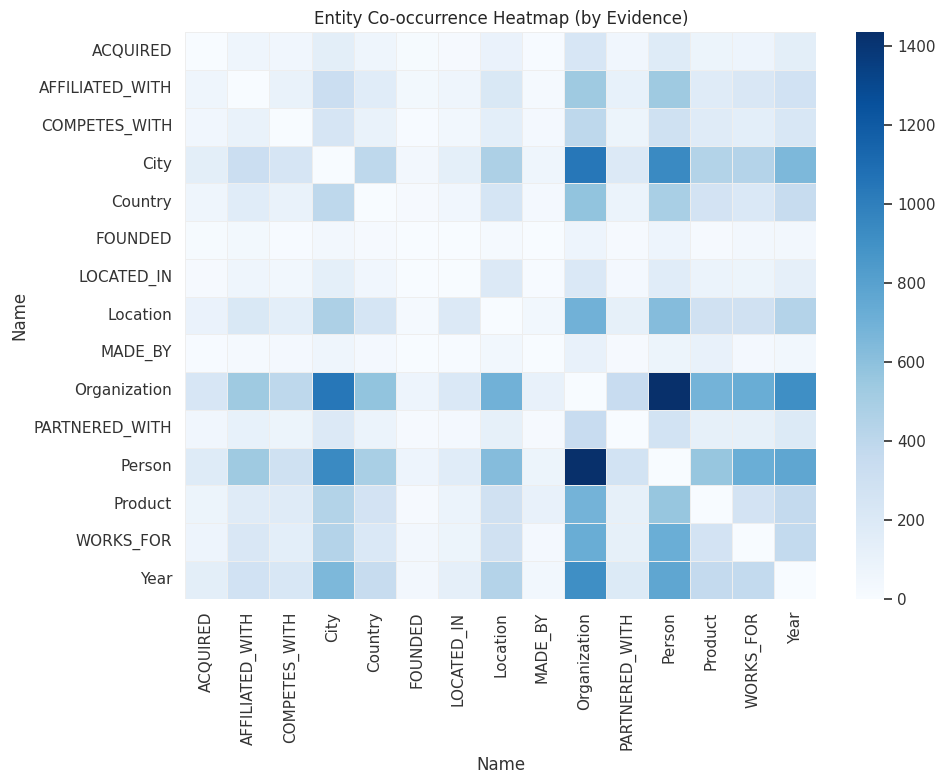

In [98]:
from itertools import combinations

# Build co-occurrence counts by evidence
pairs = []
for ev, grp in df.groupby("evidence"):
    names = sorted(set(grp["name"].dropna()))
    for a, b in combinations(names, 2):
        pairs.append((a, b))

co = pd.DataFrame(pairs, columns=["a", "b"])
if co.empty:
    print("No co-occurrences found.")
else:
    # Symmetric counts
    counts = (
        pd.concat([co, co.rename(columns={"a": "b", "b": "a"})])  # mirror
        .value_counts(["a", "b"])
        .rename("w")
        .reset_index()
    )

    # Pivot to matrix (limit to top-N to keep the heatmap readable)
    top_nodes = (
        counts.groupby("a")["w"].sum()
        .add(counts.groupby("b")["w"].sum(), fill_value=0)
        .sort_values(ascending=False)
        .head(30)  # adjust N as needed
        .index
    )

    sub = counts[counts["a"].isin(top_nodes) & counts["b"].isin(top_nodes)]
    mat = sub.pivot_table(index="a", columns="b", values="w", fill_value=0)

    # Reindex to same order
    order = sorted(top_nodes)
    mat = mat.reindex(index=order, columns=order, fill_value=0)

    plt.figure(figsize=(10, 8))
    sns.heatmap(mat, cmap="Blues", linewidths=0.5, linecolor="#eeeeee")
    plt.title("Entity Co-occurrence Heatmap (by Evidence)")
    plt.xlabel("Name")
    plt.ylabel("Name")
    plt.tight_layout()
    plt.show()
